In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.optimize as opt

xVector = np.linspace(.1, .95, 18)
yVector = np.array([11.3, 19.9, 24.9, 31.1, 37.2, 36, 59.1, 77.2, 96, 90.3, 72.2, 89.9, 91, 102, 109.7, 116, 126.6, 139.8])
sigma = 4 

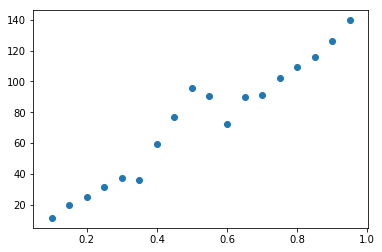

In [9]:
plt.scatter(xVector, yVector)
plt.show()

In [2]:
def FuncBackground(params, x=xVector, y=yVector):

    A, B, C = params

    modelValue = A + B*x + C*np.power(x, 2)
    chiSqrd = np.sum(np.power((modelValue - y) / sigma, 2))
    return chiSqrd

def FuncFull(params, x=xVector, y=yVector):

    A, B, C, D, E, F = params

    modelValue = A + B*x + C*np.power(x, 2) + D / (np.power(x - E, 2) + F**2)
    chiSqrd = np.sum(np.power((modelValue - y) / sigma, 2))

    return chiSqrd 

In [16]:
minBackground = opt.minimize(FuncBackground, np.array([1,1,1]))

fullInput = np.concatenate([minBackground.x, np.array([1,1,1])])

p0 = [5.0,50.0,50.0,0.5,0.5,0.5]
minFull = opt.minimize( FuncFull, p0 )

# print('Results from the background only:\n\n',minBackground,'\n')
print('Results from background plus signal:\n\n',minFull) 

('Results from background plus signal:\n\n',       fun: 14.992304973077673
 hess_inv: array([[  2.43016975e+00,  -7.69283190e+00,   6.69643428e+00,
         -7.68998568e-04,  -7.64316151e-04,   2.79993198e-04],
       [ -7.69283190e+00,   4.56830611e+01,  -4.20886052e+01,
         -1.14830527e-01,   4.16621864e-03,   1.94446997e-02],
       [  6.69643428e+00,  -4.20886052e+01,   3.95664503e+01,
          1.08655850e-01,  -3.95429545e-03,  -1.83865474e-02],
       [ -7.68998568e-04,  -1.14830527e-01,   1.08655850e-01,
          1.38906017e-03,  -2.66719686e-05,  -2.75285358e-04],
       [ -7.64316151e-04,   4.16621864e-03,  -3.95429545e-03,
         -2.66719686e-05,   2.62005410e-05,   4.10041161e-06],
       [  2.79993198e-04,   1.94446997e-02,  -1.83865474e-02,
         -2.75285358e-04,   4.10041161e-06,   5.92663706e-05]])
      jac: array([ -4.88758087e-06,  -3.57627869e-06,  -2.14576721e-06,
        -3.83377075e-04,   5.43594360e-04,  -8.82506371e-04])
  message: 'Desired error not

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.optimize as opt

xVector = np.linspace(.1, .95, 18)
yVector = np.array([11.3, 19.9, 24.9, 31.1, 37.2, 36, 59.1, 77.2, 96, 90.3, 72.2, 89.9, 91, 102, 109.7, 116, 126.6, 139.8])
sigma = 4

def FuncBackground(params, x=xVector, y=yVector):

    A, B, C = params

    modelValue = A + B*x + C*np.power(x, 2)
    chiSqrd = np.sum(np.power((modelValue - y) / sigma, 2))
    return chiSqrd

def FuncFull(x, params, x=xVector, y=yVector):
    A, B, C, D, E, F = params

    modelValue = A + B*x + C*np.power(x, 2) + D / (np.power(x - E, 2) + F**2)
    chiSqrd = np.sum(np.power((modelValue - y) / sigma, 2))

    return chiSqrd

minBackground = opt.minimize(FuncBackground, np.array([1,1,1]))

# fullInput = np.concatenate([minBackground.x, np.array([1,1,1])])
minFull = opt.minimize(FuncFull, np.array([5,50,70,0.5,0.5,0.09]))

print('Results from the background only:\n\n',minBackground,'\n')
print('Results from background plus signal:\n\n',minFull)


SyntaxError: duplicate argument 'x' in function definition (<ipython-input-1-da11670c5abf>, line 18)

In [4]:
def model_B(x, params):
    A, B, C, D, E, F = params
    modelValue = A + B*x + C*np.power(x, 2) + D / (np.power(x - E, 2) + F**2)
    return modelValue

In [25]:
minFull.x

array([  6.70631483e+00,   5.67946955e+01,   8.55068290e+01,
         1.55491514e-01,   4.93323867e-01,   6.15687649e-02])

('Results from the background only:\n\n',       fun: 92.50651485101776
 hess_inv: array([[   7.50646895,  -30.11367754,   25.48773848],
       [ -30.11367754,  141.38227268, -128.51487865],
       [  25.48773848, -128.51487865,  122.25448372]])
      jac: array([  0.00000000e+00,  -9.53674316e-07,  -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 15
     njev: 20
   status: 0
  success: True
        x: array([  -7.26757051,  173.46704786,  -28.87765648]), '\n')
('Results from background plus signal:\n\n',    direc: array([[ -2.78140068e-01,   1.94518720e+00,  -2.02872621e+00,
         -6.71174704e-03,   1.22447445e-05,  -1.19550225e-03],
       [  1.18835342e+00,  -1.65678622e+00,  -4.76186301e-01,
         -1.03582926e-02,   9.16688247e-04,  -1.40345521e-03],
       [ -4.21770069e-01,   2.73492215e+00,  -2.59097437e+00,
          1.99281732e-04,  -5.52786417e-05,   2.41101884e-04],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+

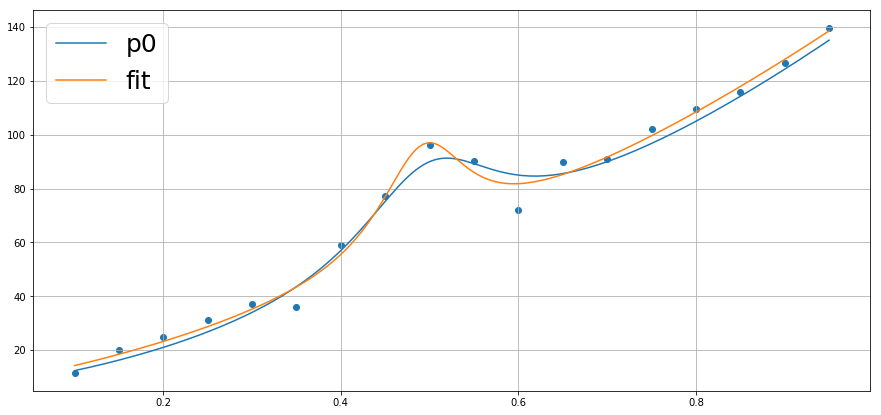

In [41]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.optimize as opt

xVector = np.linspace(.1, .95, 18)
yVector = np.array([11.3, 19.9, 24.9, 31.1, 37.2, 36, 59.1, 77.2, 96, 90.3, 72.2, 89.9, 91, 102, 109.7, 116, 126.6, 139.8])
sigma = 4.

def FuncBackground(params, x=xVector, y=yVector):

    A, B, C = params

    modelValue = A + B*x + C*np.power(x, 2)
    chiSqrd = np.sum(np.power((modelValue - y) / sigma, 2))
    return chiSqrd

def FuncFull(params, x=xVector, y=yVector):

    A, B, C, D, E, F = params
    chiSqrd = 0.
    for i in range(0, len(x)):
        modelValue = A + B*x[i] + C*np.power(x[i], 2) + D / (np.power(x[i] - E, 2) + np.power(F,2))
        chiSqrd += np.power((modelValue - y[i]) / sigma, 2)

    return chiSqrd

minBackground = opt.minimize(FuncBackground, np.array([1,1,1]))

# fullInput = np.concatenate([minBackground.x, np.array([1,1,1])])
minFull = opt.minimize(FuncFull, np.array([5.,40.,100.,0.4,0.5,0.09]), method='Powell')

print('Results from the background only:\n\n',minBackground,'\n')
print('Results from background plus signal:\n\n',minFull) 

plt.figure(figsize=(15, 7))
plt.scatter(xVector, yVector)
xplot = np.linspace(.1, .95, 200)
yplot = []
for ix in range(0,len(xplot)):
    yplot.append(model_B(xplot[ix], [5,40,100,0.4,0.5,0.1]))
yfit = []
for ix in range(0,len(xplot)):
    yfit.append(model_B(xplot[ix], minFull.x))
plt.plot(xplot, yplot, label="p0")
plt.plot(xplot, yfit, label="fit")
plt.legend(fontsize=25)
plt.grid()
plt.show()